# 파이썬으로 배우는 통계학 교과서
## 3.8. 통계적 가설검정

### t검정의 구현: 분석 준비검정의 구현: 분석 준비

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [2]:
# 데이터 읽기
# : 내용량이 50g이라고 쓰여진 과자 - 모평균이 50g 이상인가를 검정.
junk_food = pd.read_csv(
    "3-8-1-junk-food-weight.csv")["weight"]
junk_food

0     58.529820
1     52.353039
2     74.446169
3     52.983263
4     55.876879
5     67.659849
6     47.726141
7     50.266907
8     56.500826
9     52.361040
10    45.457883
11    53.360988
12    52.129368
13    59.827773
14    41.681692
15    49.398568
16    64.211128
17    69.858648
18    42.910564
19    60.158780
Name: weight, dtype: float64

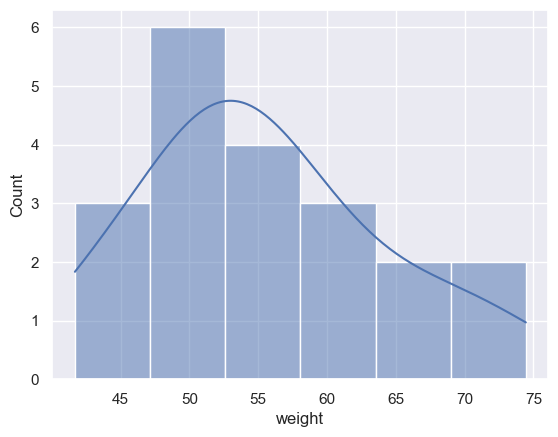

In [3]:
sns.histplot(junk_food, kde=True)
plt.show()

### t검정의 구현: t값 계산

In [4]:
# 표본평균
mu = np.mean(junk_food)
mu

55.385

In [5]:
# 자유도
# : 샘플 수가 20개이므로 20-1 로 19.
df = len(junk_food) - 1
df

19

In [6]:
# 표준오차 
# = (표준편차)/√(샘플 수)
sigma = np.std(junk_food, ddof = 1)
se = sigma / np.sqrt(len(junk_food))
se

1.958

In [7]:
# t값
t_value = (mu - 50) / se
t_value

2.750

### t검정의 구현: p값 계산

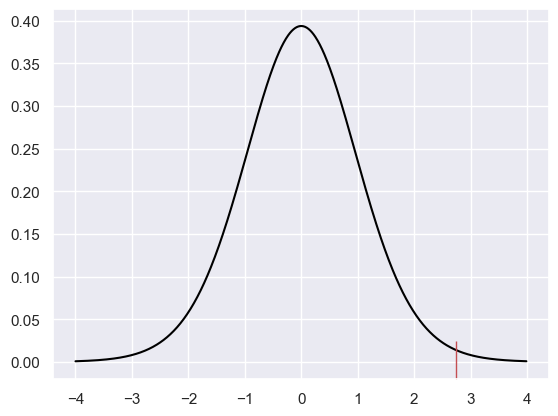

In [8]:
x_plot = np.arange(start = -4, stop = +4, step = 0.01)
plt.plot(x_plot, stats.t.pdf(x = x_plot, loc = 0, scale = 1, df=19), color = 'black')
plt.plot(t_value, [0], 'r|-', markersize = 30)
plt.show()

In [9]:
alpha = stats.t.cdf(t_value, df = df)

In [10]:
(1 - alpha)*2

0.013

In [11]:
# 단일 집단 t검정 : one sample t-test
stats.ttest_1samp(junk_food, 50)

TtestResult(statistic=np.float64(2.750339683171344), pvalue=np.float64(0.012725590012524155), df=np.int64(19))

### 시뮬레이션에 의한 p값 계산

In [12]:
# 표본의 정보를 변수에 저장
size = len(junk_food)
sigma = np.std(junk_food, ddof = 1)

In [13]:
# t값을 저장할 배열을 준비
t_value_array = np.zeros(50000)

In [14]:
# 모평균이 50(귀무가설이 옳다)고 가정하고, 표본추출과 t값 계산을 50000번 반복
np.random.seed(1)
norm_dist = stats.norm(loc = 50, scale = sigma)  # 정규분포(평균=50, 표준편차=sigma)
for i in range(0, 50000):
    sample = norm_dist.rvs(size = size)  # 위 정규분포에서 샘플을 size개 추출
    sample_mean = np.mean(sample)  # 표본평균 계산
    sample_std = np.std(sample, ddof = 1)  
    sample_se = sample_std / np.sqrt(size)  # 표준오차 계산
    t_value_array[i] = (sample_mean - 50) / sample_se  # 추출로 시뮬레이션한 표본평균의 t값을 계산해 저장.

In [15]:
(sum(t_value_array > t_value) / 50000) * 2

0.013

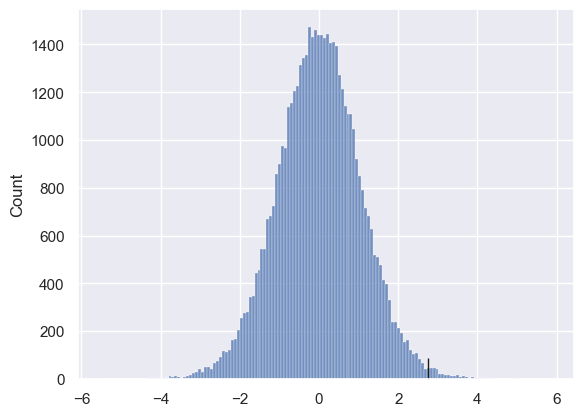

In [16]:
# 시뮬레이션 시각화
sns.histplot(t_value_array)
plt.plot(t_value, 0, 'k|', markersize = 30)
plt.show()